In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import tensorflow as tf
import importlib
import matplotlib.pyplot as plt
import os
import glob
import skimage
import cv2
from skimage import measure
from skimage import filters
from sklearn.cluster import DBSCAN
from skimage.filters import threshold_otsu
from tifffile import imread
import scipy


from scipy import ndimage

from DiscreteClustering import Discretize_Clustering
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
basedir = '/Users/aimachine/Documents/JuliaData/Julia/Subset/'
targetdir = '/Users/aimachine/Documents/JuliaData/Julia/SpectralSegmentedData/'

In [3]:
Path = os.path.join(basedir, '*.tif')
X = []
Names = []
filesRaw = glob.glob(Path)
maxtime = 0
axes = 'TYX'
for fname in filesRaw:
      x = imread(fname)
      min = np.amin(x)
      max = np.amax(x)
      x = normalizeMinMax(x, min, max)  
      X.append(x)
    
     
      Names.append(fname)
      if X[0].shape[0] > maxtime:
        maxtime = X[0].shape[0]
X.sort
Names.sort


ReshapeX = []
for i in range(len(X)):
    y = np.zeros((maxtime, X[0].shape[1], X[0].shape[2]))
    image = X[i]
    
    y[:X[i].shape[0],:,:] = image[:,:,:]
    ReshapeX.append(y)
    
ReshapeX.sort

print('Total number of input images = ', len(X))
print('Image size = ', X[0].shape)
print('Time dim = ', maxtime)

timerange = maxtime



Total number of input images =  1
Image size =  (2, 254, 256)
Time dim =  2


In [4]:
def Clustering(img):
    Labels = img
    for j in range(timerange):
      smallimg = img[j,:,:]
      
      """Put clustering code"""
    labels, N_REGIONS =Discretize_Clustering(smallimg)
    plt.figure(figsize=(5, 5))
    plt.imshow(smallimg,   cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS)), ])
    
       
    
    

time taken 114.52436709403992


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


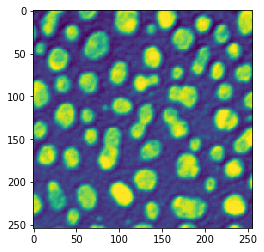

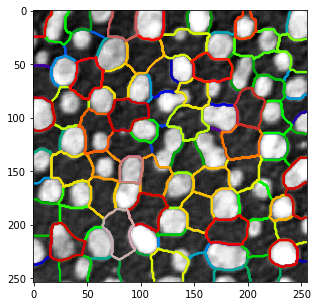

In [5]:
for i in range(0, len(ReshapeX)):
  newimg = ReshapeX[i]
  plt.imshow(newimg[0,:,:])
  Clustering(newimg)
    

